In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import splitfolders

input_dir = './DATA/simpsons_dataset/'
output_dir = './DATA/data/'

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.9, .1))

Copying files: 20933 files [00:58, 357.78 files/s]


In [4]:
train_dir = './DATA/data/train/'
val_dir = './DATA/data/val/'

image_size = (64, 64, 3)
epochs = 50
batch_size = 128

labels = os.listdir(train_dir)

In [7]:
len(labels)

43

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = image_size[:2],
                                                 batch_size=batch_size,
                                                 class_mode = 'sparse',
                                                 color_mode = 'rgb')

val_set = test_datagen.flow_from_directory(val_dir,
                                           target_size = image_size[:2],
                                           batch_size=batch_size,
                                           class_mode = 'sparse',
                                           color_mode = 'rgb')

Found 18820 images belonging to 43 classes.
Found 2113 images belonging to 43 classes.


In [10]:
# model = Sequential()
# model.add(Input(shape=image_size))
# model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(len(labels), activation = 'softmax'))

In [15]:
input_layer = Input(shape=image_size)

x1 = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(input_layer)
x2 = Conv2D(32, (3, 3), activation = 'relu')(x1)
x3 = MaxPooling2D(pool_size=(2, 2))(x2)
x4 = Dropout(0.2)(x3)
x5 = Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x4)
x6 = MaxPooling2D(pool_size=(2, 2))(x5)
x7 = Dropout(0.2)(x6)
x8 = Conv2D(256, (3, 3), padding = 'same', activation = 'relu')(x7)
x9 = MaxPooling2D(pool_size=(2, 2))(x8)
x10 = Dropout(0.2)(x9)
x11 = Flatten()(x10)
x12 = Dense(1024, activation = 'relu')(x11)
x13 = Dropout(0.5)(x12)
output_layer = Dense(len(labels), activation = 'softmax')(x13)

model = Model(inputs=input_layer, outputs = output_layer)

In [16]:
stopCB = EarlyStopping(monitor='val_acc', patience=5)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                             

In [20]:
stopCB = EarlyStopping(patience=5, monitor='val_acc')

checkpoint_filepath = './model.h5'
ModelCP = ModelCheckpoint(filepath=checkpoint_filepath,
                          save_weights_only = False,
                          monitor = 'val_acc',
                          mode = 'max',
                          save_best_only = True)

In [21]:
history = model.fit(training_set,
                    epochs=epochs,
                    validation_data = val_set,
                    callbacks = [stopCB, ModelCP])

Epoch 1/50
148/148 [==============================] - 177s 1s/step - loss: 2.8455 - acc: 0.2071 - val_loss: 2.1915 - val_acc: 0.4354
Epoch 2/50
148/148 [==============================] - 174s 1s/step - loss: 2.2298 - acc: 0.3857 - val_loss: 1.6662 - val_acc: 0.5485
Epoch 3/50
148/148 [==============================] - 180s 1s/step - loss: 1.8379 - acc: 0.4895 - val_loss: 1.3446 - val_acc: 0.6417
Epoch 4/50
148/148 [==============================] - 173s 1s/step - loss: 1.5837 - acc: 0.5606 - val_loss: 1.0967 - val_acc: 0.6919
Epoch 5/50
148/148 [==============================] - 173s 1s/step - loss: 1.3768 - acc: 0.6130 - val_loss: 0.9886 - val_acc: 0.7283
Epoch 6/50
148/148 [==============================] - 174s 1s/step - loss: 1.2383 - acc: 0.6511 - val_loss: 0.8561 - val_acc: 0.7672
Epoch 7/50
148/148 [==============================] - 192s 1s/step - loss: 1.1313 - acc: 0.6817 - val_loss: 0.7560 - val_acc: 0.7932
Epoch 8/50
148/148 [==============================] - 190s 1s/step - 

In [23]:
acc_loss_df = pd.DataFrame(history.history)
acc_loss_df

,loss,acc,val_loss,val_acc
0,2.845467,0.207067,2.191491,0.435400
1,2.229825,0.385707,1.666228,0.548509
2,1.837897,0.489532,1.344596,0.641742
3,1.583715,0.560627,1.096707,0.691907
4,1.376785,0.613018,0.988590,0.728348
5,1.238302,0.651116,0.856144,0.767156
6,1.131292,0.681722,0.756036,0.793185
7,1.050477,0.706004,0.733753,0.804070
8,0.994951,0.718491,0.944460,0.745859
9,0.976368,0.724761,0.631076,0.817321


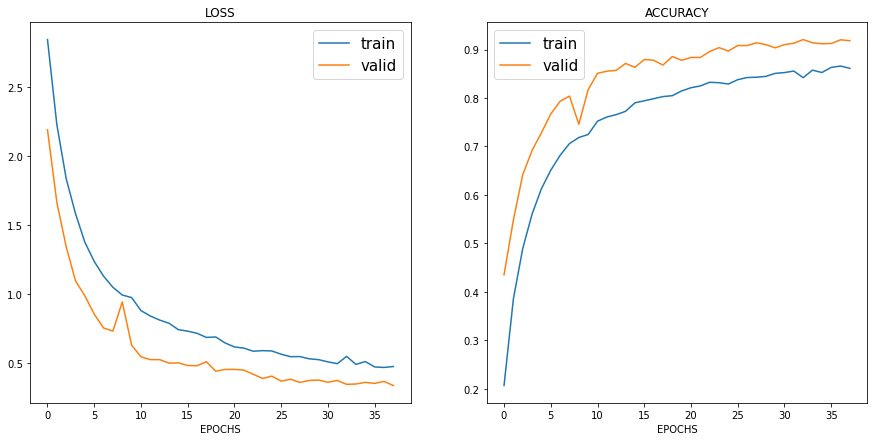

In [41]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(acc_loss_df.iloc[:, [0, 2]])
plt.title('LOSS')
plt.xlabel('EPOCHS')
plt.legend(['train', 'valid'], fontsize=15)

plt.subplot(1,2,2)
plt.plot(acc_loss_df.iloc[:, [1, 3]])
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.legend(['train', 'valid'], fontsize=15)
plt.show()

In [44]:
# loading best model
saved_model = load_model('./model.h5')

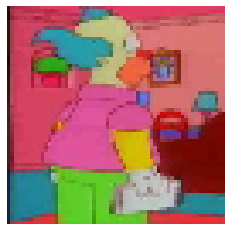

In [71]:
img_path = './DATA/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_10.jpg'
img = load_img(img_path, target_size=(64, 64, 3))
plt.imshow(img)
plt.axis('off')
plt.show()

In [72]:
def predict(img):
    img_array = img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    pred = saved_model.predict(img_batch)
    print(pred)
    pred = labels[np.argmax(pred)]
    return pred

In [73]:
predict(img)

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


'krusty_the_clown'